
# Sphere Point Cloud Generation and Visualization

The following code generates a sphere point cloud, saves it as a binary PLY file, and visualizes it using a 3D scatter plot.


In [1]:
import numpy as np
import struct

In [2]:
# Test numpy function meshgrid
theta = np.array([0, 1, 2])
phi = np.array([7, 8])
theta_grid, phi_grid = np.meshgrid(theta, phi)

print(theta_grid)
# Output:
# [[0 1 2]
#  [0 1 2]]

print(phi_grid)
# Output:
# [[7 7 7]
#  [8 8 8]]


[[0 1 2]
 [0 1 2]]
[[7 7 7]
 [8 8 8]]


In [3]:
# Test numpy function ravel
array = np.array([[1, 2, 3], [4, 5, 6]])
flat_array = np.ravel(array)

print(flat_array)
# Output:
# [1 2 3 4 5 6]


[1 2 3 4 5 6]


In [4]:
# Test numpy function vstack
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
z = np.array([7, 8, 9])
stacked = np.vstack((x, y, z))

print(stacked)
# Output:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]


[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
# Test struct function pack
packed_data = struct.pack('i', 42)  # 'i' stands for Integer (4 bytes)

print(packed_data)
# Output: b'*\x00\x00\x00'


b'*\x00\x00\x00'


In [6]:
data = b'*\x00\x00\x00'
unpacked_data = struct.unpack('<i', data)  # Little Endian Integer

print(unpacked_data)
# Output: (42,)


(42,)


In [7]:
def generate_ply_sphere(filename, radius=1, num_theta=50, num_phi=25):
    # Generate the sphere point cloud with evenly spaced Theta and Phi values
    theta = np.linspace(0, 2 * np.pi, num_theta)
    phi = np.linspace(0, np.pi, num_phi)

    # Create a meshgrid of Theta and Phi (2D arrays)
    theta, phi = np.meshgrid(theta, phi)

    # Calculate the x, y, z coordinates of the sphere using vectorized computation
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)

    # Flatten the arrays for export
    points = np.vstack((x.ravel(), y.ravel(), z.ravel())).T

    num_points = points.shape[0]

    # Write the binary PLY header
    header = f"""ply
format binary_little_endian 1.0
element vertex {num_points}
property float x
property float y
property float z
end_header
"""
    
    # Write the points to a binary PLY file
    with open(filename, 'wb') as f:
        f.write(header.encode('utf-8'))
        for point in points:
            f.write(struct.pack('fff', *point))


In [8]:
# Save the sphere as PLY file
generate_ply_sphere("sphere.ply")


In [9]:
import matplotlib.pyplot as plt


In [10]:
def plot_ply(filename):
    points = []

    # Read PLY file (binary)
    with open(filename, 'rb') as f:
        # Skip header
        while b'end_header' not in f.readline():
            pass

        # Read 3D points
        while True:
            bytes = f.read(12)  # 3 * 4 Bytes (float)
            if len(bytes) == 12:
                points.append(struct.unpack('fff', bytes))
            else:
                break

    points = np.array(points)
    
    # Create 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='b')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


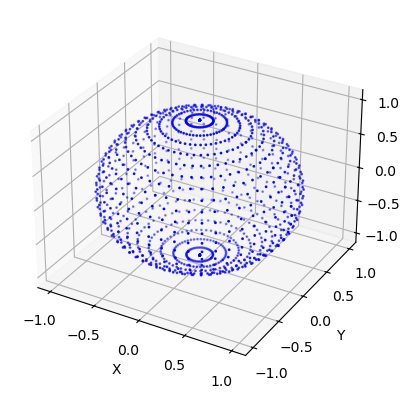

In [11]:
# Plot the sphere point cloud
plot_ply("sphere.ply")


In [12]:
import numpy as np
import struct

def generate_ply_circle(filename, radius=1, num_points=50, z=2.5):
    # Generate evenly spaced angles for the full circle
    angles = np.linspace(0, 2 * np.pi, num_points)  # 0 to 360 degrees

    # Calculate x and y coordinates of the circle using the angles
    x = radius * np.cos(angles) + radius  # Shift x by radius to ensure x > 0
    y = radius * np.sin(angles) + radius  # Shift y by radius to ensure y > 0

    # Initialize z-coordinates with the given z value
    z_coords = np.full(num_points, z)

    # Combine x, y, z into a single array of points
    points = np.vstack((x, y, z_coords)).T

    num_points = points.shape[0]

    # Write the binary PLY header
    header = f"""ply
format binary_little_endian 1.0
element vertex {num_points}
property float x
property float y
property float z
end_header
"""

    # Write the points to a binary PLY file
    with open(filename, 'wb') as f:
        f.write(header.encode('utf-8'))
        for point in points:
            f.write(struct.pack('fff', *point))


In [13]:
generate_ply_circle("circle.ply")


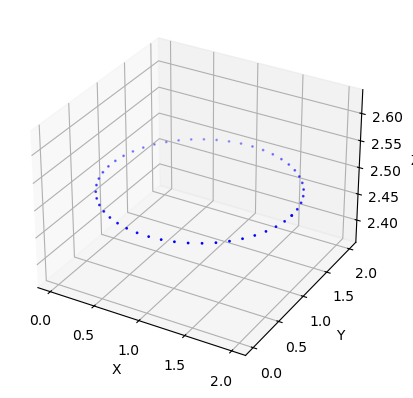

In [14]:
plot_ply("circle.ply")

# MATLAB Script Execution for Target Amplitude Calculation

The following code loads a target image, calculates the target amplitude, and runs a MATLAB script to compute emission amplitudes and phases. The results are then visualized and the mean squared error is calculated.

In [15]:
def transform_ply_data(filename):
    points = []

    # Read PLY file (binary)
    with open(filename, 'rb') as f:
        # Skip header
        while b'end_header' not in f.readline():
            pass

        # Read 3D points
        while True:
            bytes = f.read(12)  # 3 * 4 Bytes (float)
            if len(bytes) == 12:
                points.append(struct.unpack('fff', bytes))
            else:
                break
            
    points = np.array(points)
    
    print(points)
    

In [16]:
points = []

# Read PLY file (binary)
with open("circle.ply", 'rb') as f:
    # Skip header
    while b'end_header' not in f.readline():
        pass

    # Read 3D points
    while True:
        bytes = f.read(12)  # 3 * 4 Bytes (float)
        if len(bytes) == 12:
            points.append(struct.unpack('fff', bytes))
        else:
            break
            
points = np.array(points)


In [17]:
print(points)

[[2.00000000e+00 1.00000000e+00 2.50000000e+00]
 [1.99179006e+00 1.12787712e+00 2.50000000e+00]
 [1.96729481e+00 1.25365460e+00 2.50000000e+00]
 [1.92691672e+00 1.37526703e+00 2.50000000e+00]
 [1.87131870e+00 1.49071753e+00 2.50000000e+00]
 [1.80141366e+00 1.59811056e+00 2.50000000e+00]
 [1.71834934e+00 1.69568253e+00 2.50000000e+00]
 [1.62348986e+00 1.78183150e+00 2.50000000e+00]
 [1.51839256e+00 1.85514271e+00 2.50000000e+00]
 [1.40478337e+00 1.91441262e+00 2.50000000e+00]
 [1.28452754e+00 1.95866787e+00 2.50000000e+00]
 [1.15959990e+00 1.98718178e+00 2.50000000e+00]
 [1.03205156e+00 1.99948621e+00 2.50000000e+00]
 [9.03976977e-01 1.99537909e+00 2.50000000e+00]
 [7.77479053e-01 1.97492790e+00 2.50000000e+00]
 [6.54634953e-01 1.93846846e+00 2.50000000e+00]
 [5.37461698e-01 1.88659930e+00 2.50000000e+00]
 [4.27883327e-01 1.82017231e+00 2.50000000e+00]
 [3.27699095e-01 1.74027801e+00 2.50000000e+00]
 [2.38554046e-01 1.64822841e+00 2.50000000e+00]
 [1.61911890e-01 1.54553485e+00 2.500000

In [18]:
max_size = 256

# Get the minimum and maximum values of the x and y coordinates
min_vals = np.min(points[:, :2], axis=0)  # Only x and y
max_vals = np.max(points[:, :2], axis=0)  # Only x and y

# Normalize the x and y coordinates to [0, 1]
normalized_xy = (points[:, :2] - min_vals) / (max_vals - min_vals)

# Scale to the desired integer range [0, max_size-1] and convert to integers
integer_xy = (normalized_xy * (max_size - 1)).astype(int)

# Combine the integer x and y with the original z values
integer_points = np.hstack((integer_xy, points[:, 2, np.newaxis]))


In [19]:
print(integer_xy)


[[255 127]
 [253 143]
 [250 159]
 [245 175]
 [238 190]
 [229 203]
 [219 216]
 [206 227]
 [193 236]
 [179 244]
 [163 249]
 [147 253]
 [131 255]
 [115 254]
 [ 98 251]
 [ 83 247]
 [ 68 240]
 [ 54 232]
 [ 41 221]
 [ 30 210]
 [ 20 197]
 [ 12 182]
 [  6 167]
 [  2 151]
 [  0 135]
 [  0 119]
 [  2 103]
 [  6  87]
 [ 12  72]
 [ 20  57]
 [ 30  44]
 [ 41  33]
 [ 54  22]
 [ 68  14]
 [ 83   7]
 [ 98   3]
 [115   0]
 [131   0]
 [147   1]
 [163   5]
 [179  10]
 [193  18]
 [206  27]
 [219  38]
 [229  51]
 [238  64]
 [245  79]
 [250  95]
 [253 111]
 [255 127]]


# Convertion of Phases to UART data packages


In [3]:
import serial

In [5]:
import serial

# Open the serial connection
ser = serial.Serial(
    port='COM1',       # COM port (e.g., 'COM3' on Windows, '/dev/ttyUSB0' on Linux)
    baudrate=9600,     # Set the baud rate
    timeout=1          # Read timeout in seconds (optional)
)

# Check if the port is open
if ser.is_open:
    print(f"Connection to {ser.port} established.")
else:
    print(f"Connection to {ser.port} failed.")

# Send data to the serial port
ser.write(b'Hello, UART!\n')  # Send a byte sequence

# Read response from the serial device
response = ser.readline()  # Reads up to a newline or timeout
print("Received:", response.decode('utf-8'))

# Close the serial connection
ser.close()

Connection to COM1 established.
Received: 


In [7]:
class PhaseTransmitter:
    
    # Command dictionary to represent the protocol
    commands = {
        'set_phases_amplitudes': 0x80,  # Values below 0x80 are used to set phases or amplitudes
        'start_receiving_phases': 0xFE,
        'swap_buffer': 0xFD
    }

    def __init__(self, port, baudrate=9600, stopbits=serial.STOPBITS_ONE, timeout=1):
        """
        Initialize the serial connection.
        
        Parameters:
        - port: The COM port (e.g., 'COM3', '/dev/ttyUSB0')
        - baudrate: Baud rate for the communication (default 9600)
        - stopbits: Number of stop bits (default 1 stop bit)
        - timeout: Timeout for reading in seconds (default 1 second)
        """
        
        self.ser = serial.Serial(
            port=port,
            baudrate=baudrate,
            stopbits=stopbits,
            timeout=timeout
        )
        if self.ser.is_open:
            print(f"Connection to {self.ser.port} established.")
        else:
            print(f"Connection to {self.ser.port} failed.")

    def send_command(self, command):
        """Send a command to the device based on the command protocol."""
        
        if type(command) is str and command in self.commands:
            command_byte = self.commands[command]
            self.ser.write(bytes([command_byte]))
        elif type(command) is int and command < self.command['set_phases_amplitudes']:
            self.ser.write(bytes([command]))
        else:
            print("Invalid command")

    def send_phases(self, phases):
        """Send an array of phases to the device, encoded as per the protocol."""
        
        # Send command to start receiving phases
        self.send_command('start_receiving_phases')
        
        for phase in phases:
            if phase < self.commands['set_phases_amplitudes']: # According to the protocol, phase values are < 0x80
                self.ser.write(bytes([phase])) # Send phase byte
            else:
                print(f"Invalid phase value: {phase}")
                return
                
        # Once all phases are sent, we can send a command to swap buffers
        self.send_command('swap_buffer')

    def close(self):
        """Close the serial connection."""
        
        self.ser.close()


In [8]:
transmitter = PhaseTransmitter(port='COM1')
phases = [0x10, 0x20, 0x30, 0x40, 0x50, 0x60, 0x70]
transmitter.send_phases(phases)
transmitter.close()


Connection to COM1 established.
